In [74]:
%matplotlib notebook
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

import glob
import pandas as pd
import numpy as np
from datetime import datetime
import time



# 불쾌지수 계산(Discomfort Index)
def calcDiscomfort(t, h):
    # t; 기온(섭씨)
    # rh; 상대습도(%)
    return round((1.8*t - 0.55*(1-h/100)*((1.8*t)-26) + 32), 2)

# 체감온도 계산(Sensible Temperature)
def calcST(t, v):
    # t; 기온
    # v; 풍속(m/s) => V(Km/h)로 환산해야 됨(* 3.6)
    return round((13.12 + (0.6215 * t) - (11.37 * ((v * 3.6) ** 0.16)) + (0.3965 * ((v * 3.6) ** 0.16) * t)), 2)

def str2dt(s, p='%Y-%m-%d %H:%M:%S'):
    # s = '2021-01-01 00:00:00'
    return datetime.strptime(s, p)

def dt2ts(dt):
    return time.mktime(dt.timetuple())

def ts2str(ts):
    return datetime.fromtimestamp(ts)

# 시강정보 파일 이름 확인
# getAsosFilePath('./tmp/', 108, 2018, 12)
# './tmp/SURFACE_ASOS_108_MI_2018-01_2018-01_2018.csv'
def getAsosFilePath(parDirPath, asos, y, m):
    yearMon = f'{y}-{m.zfill(2)}'
    return f'{parDirPath}SURFACE_ASOS_{asos}_MI_{yearMon}_{yearMon}_{str((int(y) + 1) if m==12 else y)}.csv'

# path의 asos data를 전처리 후 리턴
def getDF(path):
    weatherDataidx = ['asos','date','temp_c','rain_mm','windDir_deg','windVel_ms',
              'atomsPLand_hPa','atomsPSea_hPa','hum_per','solarJ_mj','solarT_sec']
    
    # dataframe load
    df = pd.read_csv(path, encoding='euc-kr')
    df.columns = weatherDataidx
    df.date = pd.to_datetime(df.date)
    df.set_index('date')

    ######## 결측값 처리 : 중간값 보간. 선형으로 이어줌
    ##### df.interpolate(inplace=True) # Error Why???????????
    df.temp_c.interpolate(inplace=True)
    df.rain_mm.interpolate(inplace=True)
    df.windDir_deg.interpolate(inplace=True)
    df.windVel_ms.interpolate(inplace=True)
    df.atomsPLand_hPa.interpolate(inplace=True)
    df.atomsPSea_hPa.interpolate(inplace=True)
    df.hum_per.interpolate(inplace=True)
    df.solarJ_mj.interpolate(inplace=True)
    df.solarT_sec.interpolate(inplace=True)
    ################## 여기까지 전처리
    
    return df

## 불쾌지수, 체감온도 컬럼 추가 후 리턴
def addDisAndSenseCol(df):
#     # 불쾌지수, 체감온도 컬럼 추가 코드
    df['discomfortIdx'] = calcDiscomfort(df['temp_c'], df['hum_per'])
    df['sensibleTemp'] = calcST(df['temp_c'], df['windVel_ms'])
    return df


######## 이하 참고용 #####
# # 날짜 확인
# df.date = pd.to_datetime(df.date)
# dt1 = datetime.strptime('2021-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
# dt2 = datetime.strptime('2022-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
# con = (df.date >= dt1) & (df.date < dt2)
# df[con] # 조건에 일치하는 row만 출력

######## 그래프 그리기(함수 작성중)
### before inter 그래프 작성
### # line scatter
# def drawBefore(v):
#     result['bef'] = tmp.rain_mm.copy()
#     print(path)
#     result.plot(kind=v, x='date', y=['bef'], title='rain_mm',
#                 legend=True, fontsize=13, figsize=(30,5), grid=True)

# ### after inter 그래프 작성
# def drawAfter(v):
#     result['aft'] = tmp.rain_mm.interpolate()
#     print(path)
#     result.plot(kind=v, x='date', y=['aft'], title='rain_mm',
#                 legend=True, fontsize=13, figsize=(30,5), grid=True)
    
# def drawGraph(df, x, y, kind='scatter', title=''):
#     df.plot(kind=kind, title=title, x=x, y=y,
#                 legend=True, fontsize=13, figsize=(30,5), grid=True)
    
# # drawBefore('scatter')
# # drawAfter('scatter')

# drawGraph(tmp, x='date', y=['discomfortIdx', 'sensibleTemp'])

In [254]:
######## main #
#### 사용 예시
fileList_weather = glob.glob('../DataSet/SURFACE_ASOS_RawData/MIN/*')
fileList_weather.sort()

path = fileList_weather[6] # SURFACE_ASOS_108_MI_2018-01_2018-01_2018.csv

## asos 기상정보 rawData path로부터 전처리 과정(결측값 보간)을 수행한 dataframe을 얻는다.
df = getDF(path)

## df에 '불쾌지수', '체감온도' 데이터를 추가한다.
df = addDisAndSenseCol(df)

<IPython.core.display.Javascript object>


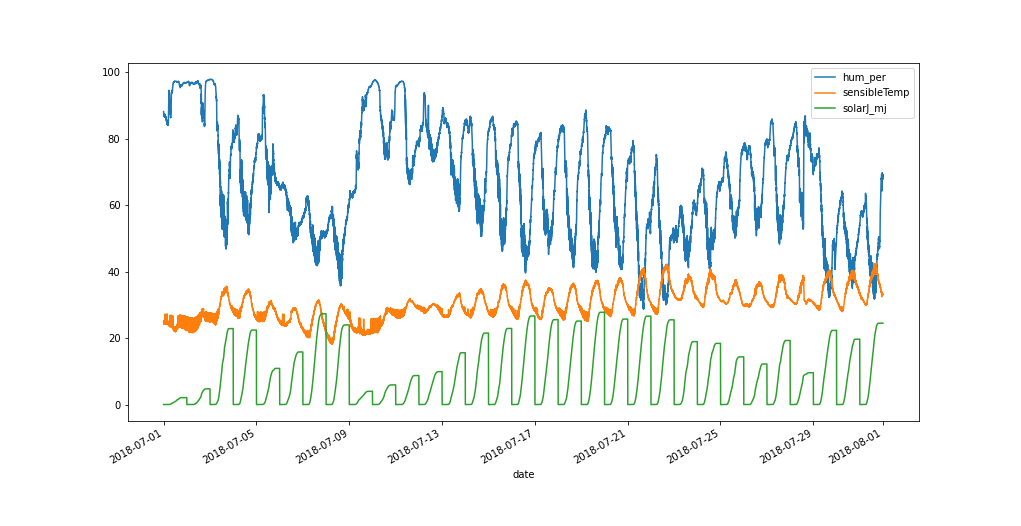

<AxesSubplot:xlabel='date'>

In [266]:
# df.plot(x='date', y=['hum_per', 'sensibleTemp','solarJ_mj'])

In [65]:
teamRawDataPath = 'teamRawData_Fromjson.xlsx'

teamdf = pd.read_excel(teamRawData)

tmp = teamdf[['date','asos']].copy()
ss = (tmp.asos.apply(str) + '.' + tmp.date.apply(lambda x: f'{x.year}.{x.month}')).apply(lambda x: x.split('.')).to_list()

In [71]:
## 실제 경기 날과 연관있는 기상정보들
filelist = []
for d in ss:
    filelist.append(getAsosFilePath('../DataSet/SURFACE_ASOS_RawData/MIN/', d[0], d[1], d[2]))
filelist = list(set(filelist))
filelist.sort()

In [76]:
path = '../DataSet/SURFACE_ASOS_RawData/MIN/SURFACE_ASOS_108_MI_2018-03_2018-03_2018.csv'

df = addDisAndSenseCol(getDF(path))

In [79]:
df

,asos,date,temp_c,rain_mm,windDir_deg,windVel_ms,atomsPLand_hPa,atomsPSea_hPa,hum_per,solarJ_mj,solarT_sec,discomfortIdx,sensibleTemp
0,108,2018-03-01 00:01:00,2.0,0.0,232.7,0.9,993.0,1003.6,96.1,0.00,0,36.08,1.60
1,108,2018-03-01 00:02:00,2.0,0.0,90.0,0.4,992.9,1003.5,96.1,0.00,0,36.08,3.15
2,108,2018-03-01 00:03:00,2.0,0.0,157.2,0.1,992.9,1003.5,96.1,0.00,0,36.08,5.38
3,108,2018-03-01 00:04:00,2.0,0.0,0.0,0.1,992.9,1003.5,96.1,0.00,0,36.08,5.38
4,108,2018-03-01 00:05:00,2.0,0.0,253.2,0.5,993.0,1003.6,96.0,0.00,0,36.09,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44611,108,2018-03-31 23:56:00,12.1,0.0,192.5,1.0,1008.2,1018.5,70.1,17.08,28140,54.47,12.57
44612,108,2018-03-31 23:57:00,12.1,0.0,234.0,0.8,1008.2,1018.5,70.3,17.08,28140,54.47,12.86
44613,108,2018-03-31 23:58:00,12.1,0.0,271.7,0.9,1008.2,1018.5,70.4,17.08,28140,54.47,12.71
44614,108,2018-03-31 23:59:00,12.1,0.0,225.5,0.5,1008.2,1018.5,70.2,17.08,28140,54.47,13.42


In [81]:
df.merge(teamdf)

,asos,date,temp_c,rain_mm,windDir_deg,windVel_ms,atomsPLand_hPa,atomsPSea_hPa,hum_per,solarJ_mj,solarT_sec,discomfortIdx,sensibleTemp,park,home,away,homeWin,home_score,away_score
0,108,2018-03-24 14:00:00,12.7,0.0,208.7,2.2,1011.1,1021.4,55.1,9.59,12840,55.64,12.19,잠실,두산,삼성,-3,3,6
1,108,2018-03-24 14:00:00,12.7,0.0,208.7,2.2,1011.1,1021.4,55.1,9.59,12840,55.64,12.19,고척,키움,한화,3,6,3
2,108,2018-03-25 14:00:00,16.1,0.0,192.1,3.1,1013.9,1024.1,36.7,12.98,19020,59.94,15.79,잠실,두산,삼성,1,5,4
3,108,2018-03-25 14:00:00,16.1,0.0,192.1,3.1,1013.9,1024.1,36.7,12.98,19020,59.94,15.79,고척,키움,한화,-3,1,4
4,108,2018-03-27 18:30:00,16.0,0.0,284.4,2.5,1005.4,1015.5,61.6,15.98,28740,60.21,15.92,잠실,두산,롯데,5,5,0
5,108,2018-03-27 18:30:00,16.0,0.0,284.4,2.5,1005.4,1015.5,61.6,15.98,28740,60.21,15.92,고척,키움,LG,1,5,4
6,108,2018-03-28 18:30:00,16.5,0.0,219.0,2.0,1005.8,1015.9,56.7,13.94,17820,60.82,16.75,잠실,두산,롯데,1,6,5
7,108,2018-03-28 18:30:00,16.5,0.0,219.0,2.0,1005.8,1015.9,56.7,13.94,17820,60.82,16.75,고척,키움,LG,-6,3,9
8,108,2018-03-29 18:30:00,18.3,0.0,304.0,2.1,1008.7,1018.7,54.8,14.85,27000,63.21,18.81,잠실,두산,롯데,3,4,1
9,108,2018-03-29 18:30:00,18.3,0.0,304.0,2.1,1008.7,1018.7,54.8,14.85,27000,63.21,18.81,고척,키움,LG,5,9,4


In [91]:
ooo = teamdf[teamdf.asos == 108]
ooo = ooo[ooo.date < str2dt('2018-04-01 00:00:00')]
ooo

,date,park,asos,home,away,homeWin,home_score,away_score
1,2018-03-24 14:00:00,잠실,108,두산,삼성,-3,3,6
4,2018-03-24 14:00:00,고척,108,키움,한화,3,6,3
6,2018-03-25 14:00:00,잠실,108,두산,삼성,1,5,4
9,2018-03-25 14:00:00,고척,108,키움,한화,-3,1,4
11,2018-03-27 18:30:00,잠실,108,두산,롯데,5,5,0
14,2018-03-27 18:30:00,고척,108,키움,LG,1,5,4
16,2018-03-28 18:30:00,잠실,108,두산,롯데,1,6,5
19,2018-03-28 18:30:00,고척,108,키움,LG,-6,3,9
21,2018-03-29 18:30:00,잠실,108,두산,롯데,3,4,1
24,2018-03-29 18:30:00,고척,108,키움,LG,5,9,4
